### For Assignment 2 you should design your own investigation into the citibike data.¶
#### # Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. # At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. Categorical cn be anhything that can be punt into classes (e.g. day/night, male/female, 2014/2015/2016.... as long as you set up your experiment the proper way!)
#### # Choose the significance threshold
#### # Clearly state they Null and Alternate hypothesis
#### # Wrangle the data so that it is ready for your analysis.

### Null Hypotesis
#### H0 =>The total percentage of New Yorkers using bike is as much if not less than the total percentage of Tourists riding a bike in any given week

##### significance level    $\alpha=0.05$

### Alternative Hypothesis
#### H1 ==> Tourists use as many citibike as NewYorkers in any given week

### This data is from January 2014

##### The file has been added to PUIdata directory manually, but if the link works it can fetch the file directly from datahub

In [14]:
import pylab as pl
import pandas as pd
import numpy as np
import seaborn
from scipy.optimize import curve_fit, minimize
    
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def getCitiBikeCSV(datestring):
    import os
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
getCitiBikeCSV('201401')

file in place, you can continue


In [4]:
import pandas as pd
import os
df = pd.read_csv(os.getenv("PUIDATA") + "/" + '201401'+ '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1,2014-01-01 00:00:06
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1,2014-01-01 00:00:38
2,464,2014-01-01 00:03:59,2014-01-01 00:11:43,228,E 48 St & 3 Ave,40.754601,-73.971879,2022,E 59 St & Sutton Pl,40.758491,-73.959206,16613,Subscriber,1991,1,2014-01-01 00:03:59
3,373,2014-01-01 00:05:15,2014-01-01 00:11:28,519,Pershing Square N,40.751884,-73.977702,526,E 33 St & 5 Ave,40.747659,-73.984907,15938,Subscriber,1989,1,2014-01-01 00:05:15
4,660,2014-01-01 00:05:18,2014-01-01 00:16:18,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,436,Hancock St & Bedford Ave,40.682166,-73.953990,19830,Subscriber,1990,1,2014-01-01 00:05:18


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:

df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid','gender',
       'birth year'], axis=1, inplace=True)

In [7]:
df.head()

,usertype,date
0,Subscriber,2014-01-01 00:00:06
1,Subscriber,2014-01-01 00:00:38
2,Subscriber,2014-01-01 00:03:59
3,Subscriber,2014-01-01 00:05:15
4,Subscriber,2014-01-01 00:05:18


In [12]:
df['usertype'] = df.usertype.replace('Customer', 2)
df['usertype'] = df.usertype.replace('Subscriber', 1)
df.head()

,usertype,date
0,1,2014-01-01 00:00:06
1,1,2014-01-01 00:00:38
2,1,2014-01-01 00:03:59
3,1,2014-01-01 00:05:15
4,1,2014-01-01 00:05:18


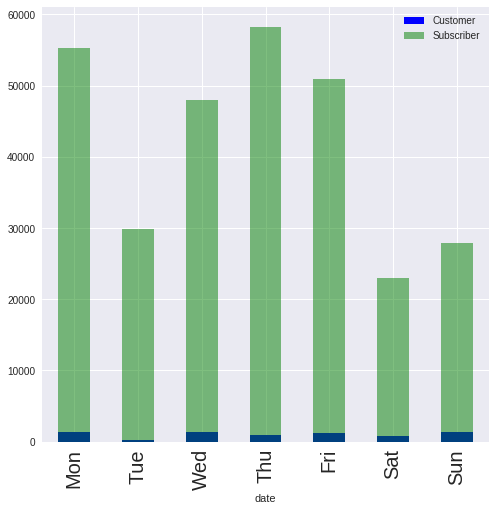

In [16]:
fig=pl.figure(figsize=(8,8))

#instead of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
ax=((df['date'][df['usertype'] == 2].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar",color='blue',label='Customer')

norm_m = 1
ax = ((df['date'][df['usertype'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar",color='green',alpha=0.5,label='Subscriber')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

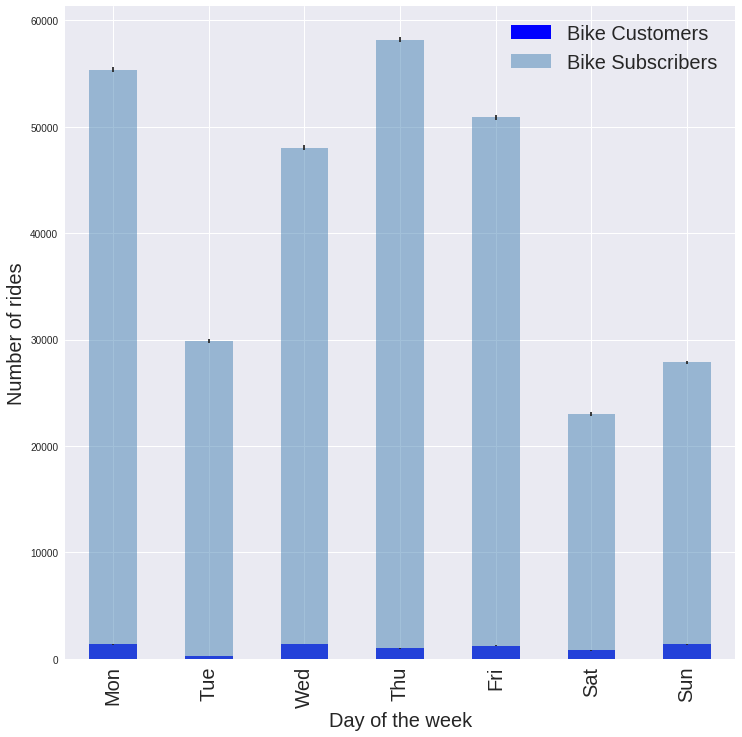

In [17]:
fig=pl.figure(figsize(12,12))

counts_c = df.date[df.usertype == 2].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c = np.sqrt(counts_c)
ax=((counts_c) / norm_c).plot(kind="bar",color='blue',  yerr=[((error_c) / norm_c, (error_c) / norm_c)], label='Bike Customers')


counts_s = df.date[df.usertype==1].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s=np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           color='SteelBlue', label='Bike Subscribers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides",size=20)
ax.set_xlabel ("Day of the week",size=20)
pl.legend(['Bike Customers','Bike Subscribers'],fontsize=20,loc='best')

### Figure 1b: Distribution of Citibike bikers by gender in January 2015, absolute counts, with statistical errors¶
Note: These are absolute numbers. It is very hard to compare absolute numbers. Ratios (or proportions) are more ameable to comparison, so let's normalize the distribution of man, and that of women, i.e. devide them by the total number of rides for that gender. (Notice that i have to normalize the errorbars too!)

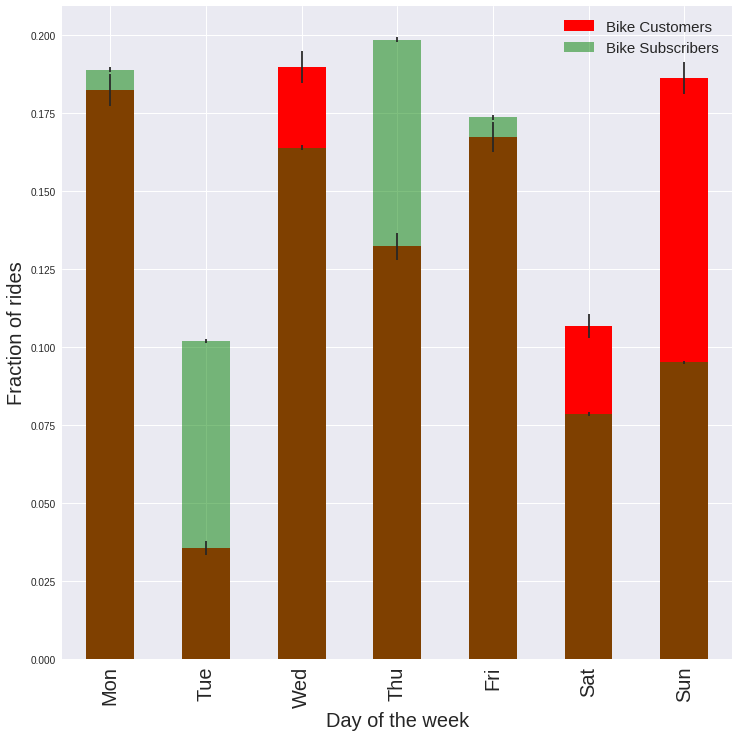

In [18]:
fig = pl.figure(figsize(12,12))

norm_c = counts_c.sum()
error_c = np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", color='red',  
                           yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           label='Bike Customers')

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                                color='green', label='Bike Subscribers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides",size=20)
ax.set_xlabel ("Day of the week",size=20)

pl.legend(['Bike Customers','Bike Subscribers'],fontsize=15)